# Music

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
import music21
from music21 import *
from IPython.display import Image, Audio

In [7]:
from utils import *

## Test existing dataset

In [5]:
# path = Path('data/composers/notewise/piano_solo/note_range38/sample_freq12')
path = Path('data/composers/notewise/piano_solo/note_range62/sample_freq4')
path.ls()[:3]

[PosixPath('data/composers/notewise/piano_solo/note_range62/sample_freq4/jazz'),
 PosixPath('data/composers/notewise/piano_solo/note_range62/sample_freq4/ravel'),
 PosixPath('data/composers/notewise/piano_solo/note_range62/sample_freq4/bach')]

In [6]:
idx = 10
folder_idx = -4 # 2 = bach
seed_len = 500

file = path.ls()[folder_idx].ls()[idx]
with open(file, 'r') as f:
    txt_out = f.read()
notes = txt_out.split(' ')
seed = ' '.join(notes[:seed_len])

note_offset = 45 if 'note_range38' in str(file) else 33
sample_freq = 12 if 'sample_freq12' in str(file) else 4

note_offset, sample_freq, file

(33,
 4,
 PosixPath('data/composers/notewise/piano_solo/note_range62/sample_freq4/dvorak/slavdan2.txt'))

In [8]:
import utils

In [9]:
dir(utils)

['Midi',
 'Note',
 'NoteSeq',
 'Path',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'arrToStreamChordwise',
 'arrToStreamNotewise',
 'create_paths',
 'dump_param_dict',
 'floor',
 'music21',
 'np',
 'os',
 'pd',
 'pickle',
 'random',
 'string_inds_to_stream',
 'write_mid_mp3_wav',
 'write_midi']

Here we use `arrToStreamNotewise` so we can retrieve the stream directely. *Modified* function to only return the piano stream as the main stream does not play sound directly.  
Alternatively, you can save with `write_mid_mp3_wav`. Then play the saved sound.

In [28]:
note_stream = arrToStreamNotewise(seed.split(' '), sample_freq=sample_freq, note_offset=note_offset)

In [29]:
note_stream.show('midi')

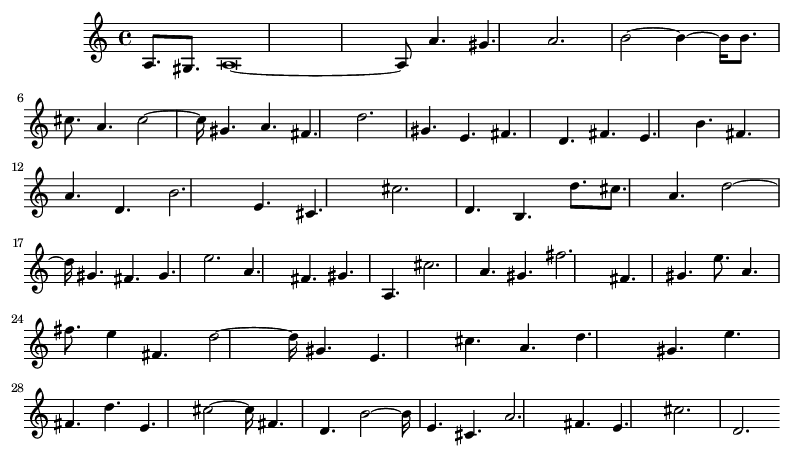

In [21]:
Image(filename=str(note_stream.write('lily.png')))

### When showing scores, use `chordify`.

This gives you a better representation. Otherwise it treats all chords as sequential notes.  
However, the midi seems more screwed up when converted

In [22]:
note_stream.chordify().show('midi')

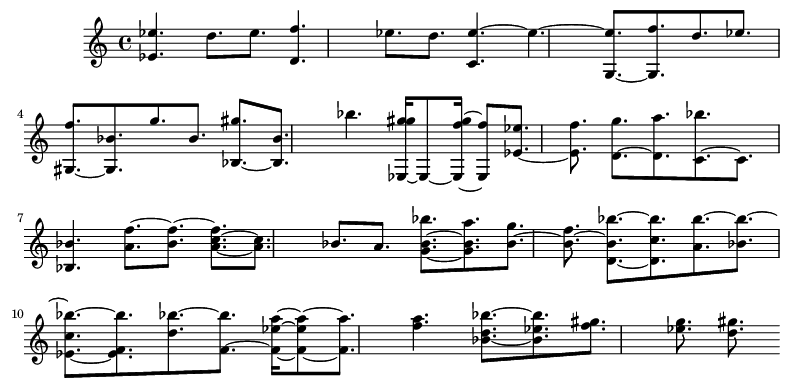

In [17]:
Image(filename=str(note_stream.chordify().write('lily.png')))

#  Bach to encoding and back

Sanity check - convert existing corpus

## Let's find a short song

In [4]:
predicate = lambda x: 400 < x < 500
s = corpus.corpora.CoreCorpus().search(predicate, 'noteCount')
b = corpus.parse('bach/bwv126.6')

In [64]:
# begin
b.show('midi')

In [31]:
import midi_to_encoding as m2e

In [ ]:
# note_offset = 45 if 'note_range38' in str(file) else 33
# sample_freq = 12 if 'sample_freq12' in str(file) else 4

In [34]:
note_offset = 45
note_range = 38
sample_freq = 12

In [65]:
chord_out = m2e.stream_to_chordwise(b.flat, False, note_range, note_offset, sample_freq)
notewise_out = m2e.chord_to_notewise(chord_out, sample_freq=sample_freq)

In [69]:
s_back = arrToStreamNotewise(notewise_out.split(' '), sample_freq=sample_freq, note_offset=note_offset)

In [70]:
s_back.show('midi')

In [76]:
s_back.chordify().show('midi')

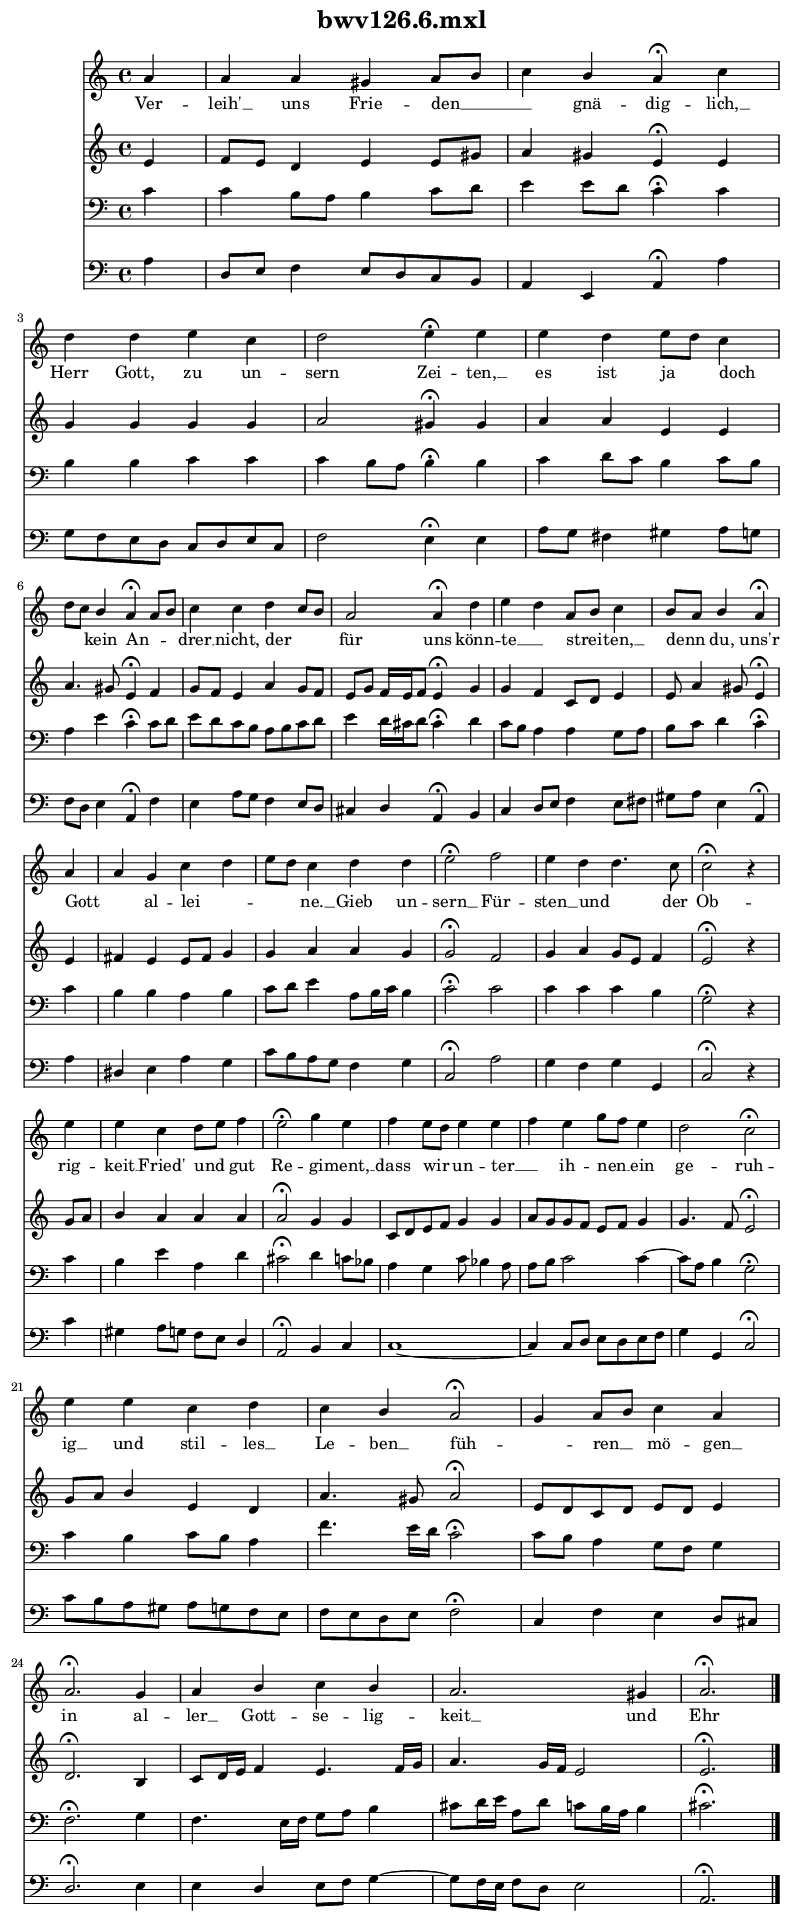

In [73]:
Image(filename=str(b.write('lily.png')))

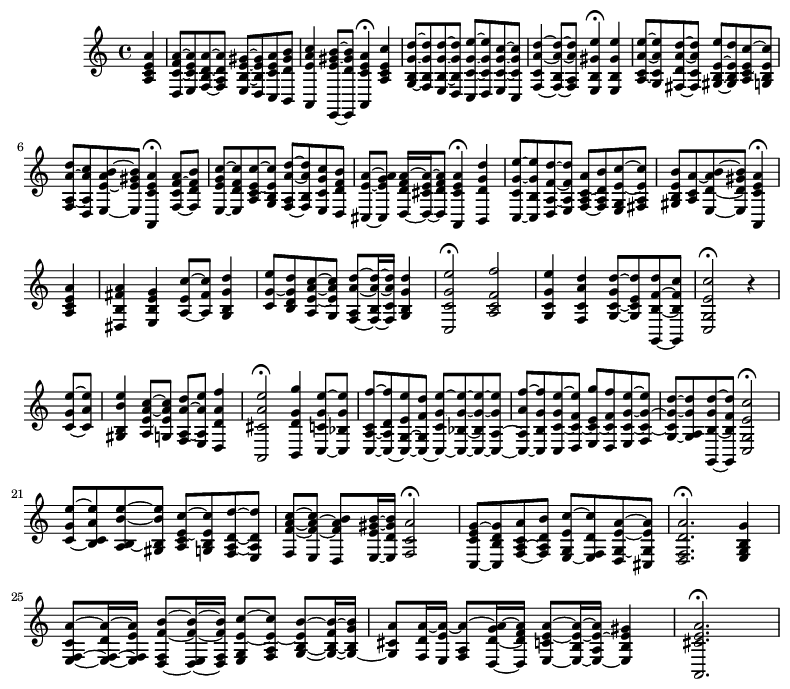

In [75]:
Image(filename=str(b.chordify().write('lily.png')))

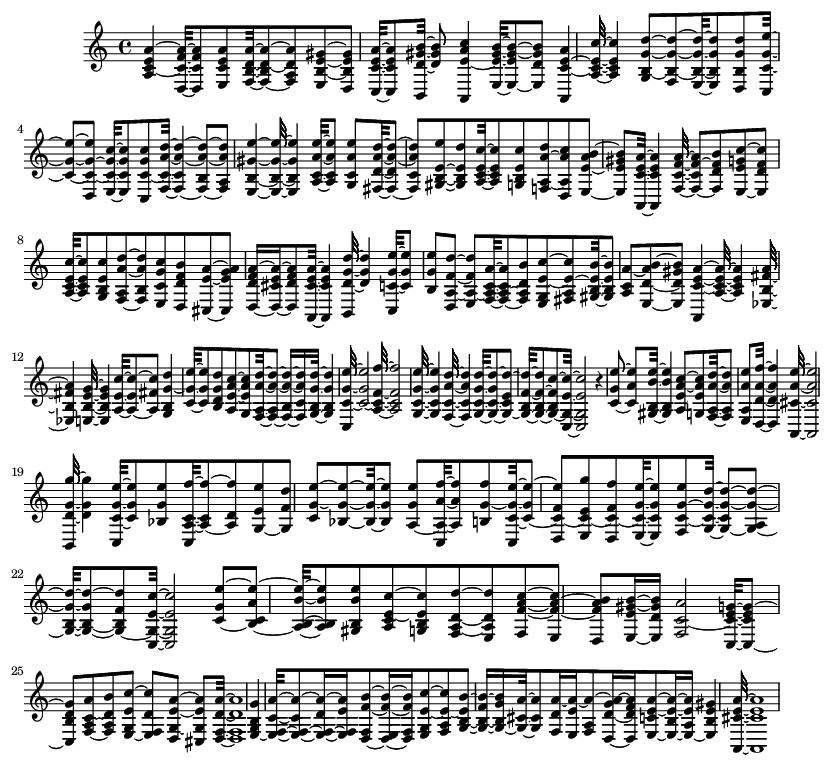

In [74]:
Image(filename=str(s_back.chordify().write('lily.png')))

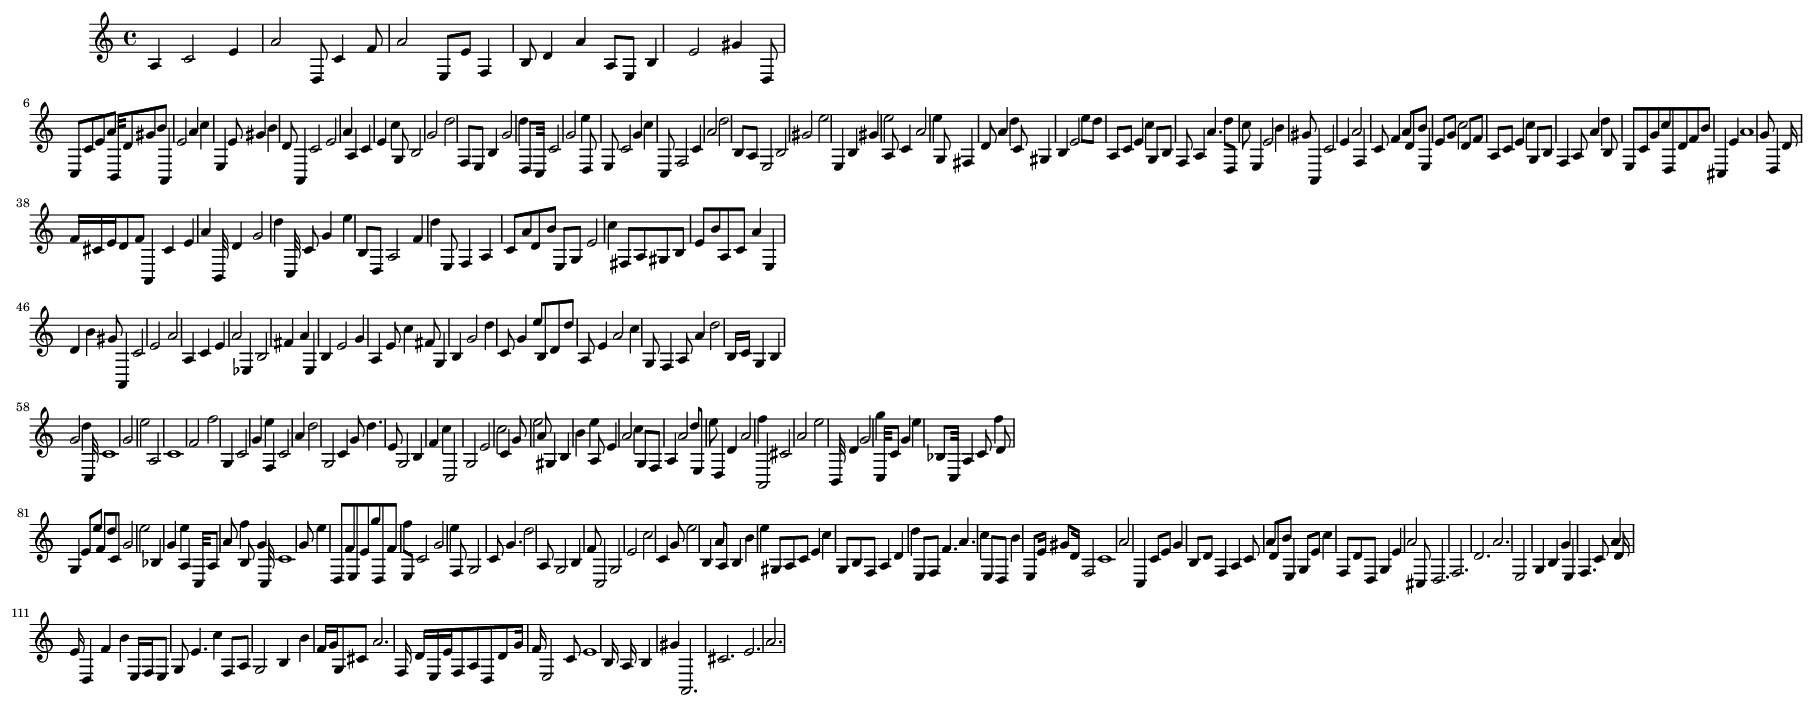

In [72]:
Image(filename=str(s_back.write('lily.png')))